### Dimension Reduction

* Dimension Reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data.

* Dimension Reduction is necessary because too many dimensions may capture information which are redundant. Also, having a large number of dimensions in the feature space can mean that the volume of that space is very large, and in turn, the points that we have in that space (rows of data) often represent a small and non-representative sample.

* These impact the performance of the models and hence it is important to effectively reduce the dimension of data.

The following are some of the Dimension Reduction Techniques that can be implemented using Python:

1. Principal Component Analysis (PCA) : PCA is a statistical method that uses the process of linear, orthogonal transformation to transform a higher-dimensional set of features that could be possibly correlated into a lower-dimensional set of linearly uncorrelated features. These transformed and newly created features are also known as Principal Components or PCs


2. Kernel Principal Component Analysis (k-PCA) : k-PCA is an extension of PCA using techniques of kernel methods. This works well for non-linear datasets.

 
3. Singular Value Decomposition (SVD) : SVD is a technique from linear algebra that can be used to automatically perform dimensionality reduction and is used mostly for sparse data like Recommender System, User Movie Rating etc.


4. Linear Discriminant Analysis (LDA) : LDA is a predictive modeling algorithm for multi-class classification. It can also be used as a dimensionality reduction technique, providing a projection of a training dataset that best separates the examples by their assigned class.


5. T-distributed Stochastic Neighbor Embedding (T-SNE) : T-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.


6. Autoencoders : Autoencoders are artificial neural networks capable of learning efficient representations of the input data, called codings, without any supervision (i.e., the training set is unlabeled).


7. Uniform Manifold Approximation and Projection (UMAP) :  UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology. The result is a practical scalable algorithm that applies to real world data. The UMAP algorithm is competitive with t-SNE for visualization quality, and arguably preserves more of the global structure with superior run time performance. Furthermore, UMAP has no computational restrictions on embedding dimension, making it viable as a general purpose dimension reduction technique for machine learning.

Some others are Incremental PCA, Sparse PCA, Gaussian Random Projection, MultiDimensional Scaling etc.

### Application of Dimension Reduction on Image

We carry out an analysis to show how Dimension Reduction can be used to on Images. We use PCA and Incremental PCA here to illustrate.

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt


In [2]:
image = imread("project_image.jpg")
print(image.shape)

(225, 225, 3)


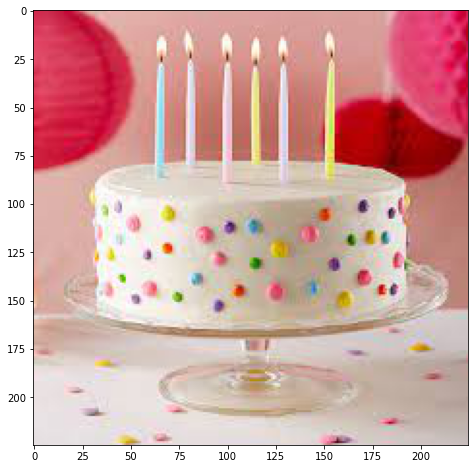

In [3]:
# Displaying the image
plt.figure(figsize=[8,8]);
plt.imshow(image);

#### Image understanding -
* The image is a colour image and has data in 3 channels- Red, Green, Blue.
* The shape of the data (225 x 225 x 3) means it is 225 x 225 matrix for each channel.

To avoid working with 3 channels we will convert the image to black and white.

(225, 225)


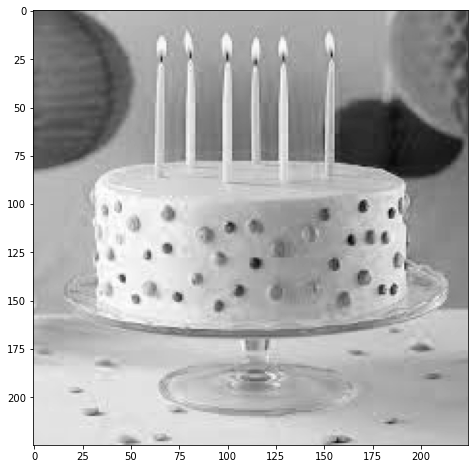

In [4]:
# Converting to black and white

image_sum = image.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()

plt.figure(figsize=[8,8]);
plt.imshow(image_bw, cmap=plt.cm.gray);

#### Perform PCA on the Image

* We use PCA on the black and white image data and check the variance explained by each component.
* Post that we will decide on the cut-off for variance explanation through scree-plot and check the corresponding number of components.

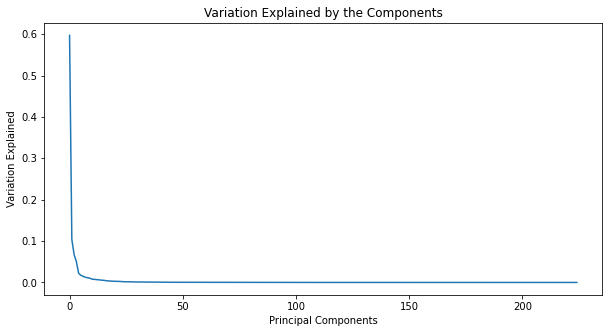

Text(0.5, 0, 'Principal Components')

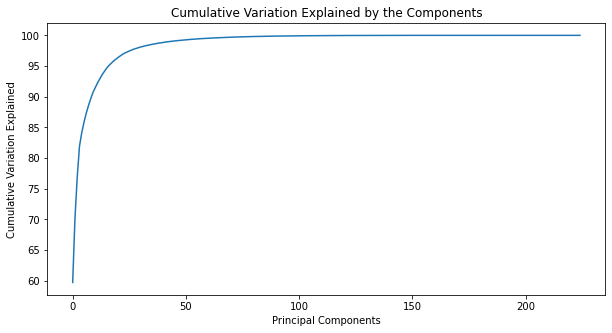

In [6]:
from sklearn.decomposition import PCA, IncrementalPCA
from scipy.stats import zscore

pca = PCA()
pca.fit(image_bw)

plt.figure(figsize=[10,5])
ax=plt.plot(pca.explained_variance_ratio_)
plt.title('Variation Explained by the Components')
plt.ylabel('Variation Explained')
plt.xlabel('Principal Components')
plt.show()

# Getting the cumulative variance

var_cum = np.cumsum(pca.explained_variance_ratio_)*100

plt.figure(figsize=[10,5])
ax = plt.plot(var_cum)
plt.title('Cumulative Variation Explained by the Components')
plt.ylabel('Cumulative Variation Explained')
plt.xlabel('Principal Components')

We now check how many components explain 90% of the variation. From the scree-plotit seems around 10 components, however we will confirm the same.

In [7]:
# How many PCs explain 90% of the variance?
k = np.argmax(var_cum>90)
print("Number of components explaining 90% variance: "+ str(k))

Number of components explaining 90% variance: 9


We can get 90% of the variation with 9 components. Similarly, let's check for 95%.

In [8]:
# How many PCs explain 95% of the variance?
k = np.argmax(var_cum>95)
print("Number of components explaining 95% variance: "+ str(k))

Number of components explaining 95% variance: 16


Hence, we see that from 225 we can get down to around 10-15 pixels. Now we will check how much of the original features of the image we are able to retain. For that we:

1. Use the fit_transform method from the IncrementalPCA module to find the 9 PCs and transform and represent the data in those 9 new components/columns.
2. Reconstruct the original matrix from these 9 components using the inverse_transform method.
3. Plot the image to visually assess the quality of it.

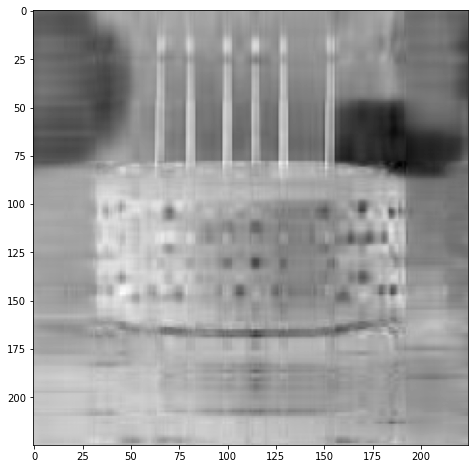

In [9]:
ipca = IncrementalPCA(n_components=9)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[8,8]);
plt.imshow(image_recon,cmap = plt.cm.gray);

Though the image is hazzy we can still understand a lot of features of it - example the cake and candles are very much understandable.


We can try with 16, since it explains 95% variation and check.

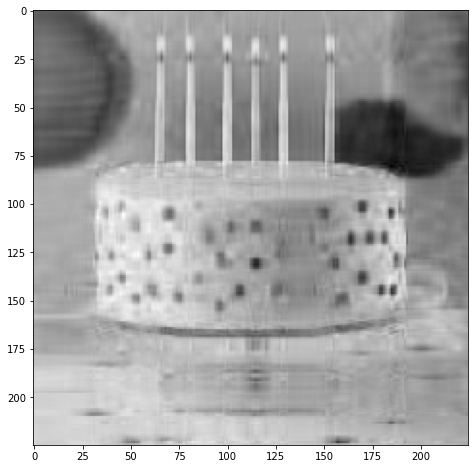

In [10]:
ipca = IncrementalPCA(n_components=16)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[8,8]);
plt.imshow(image_recon,cmap = plt.cm.gray);

The above is very clear and even the decorations of the cake are now better visible. However, the hazziness still remains.

We now try with different values of k which will explain more than 90% variation and compare the images to check for maximum how many pixels we can get a distinguishable image.

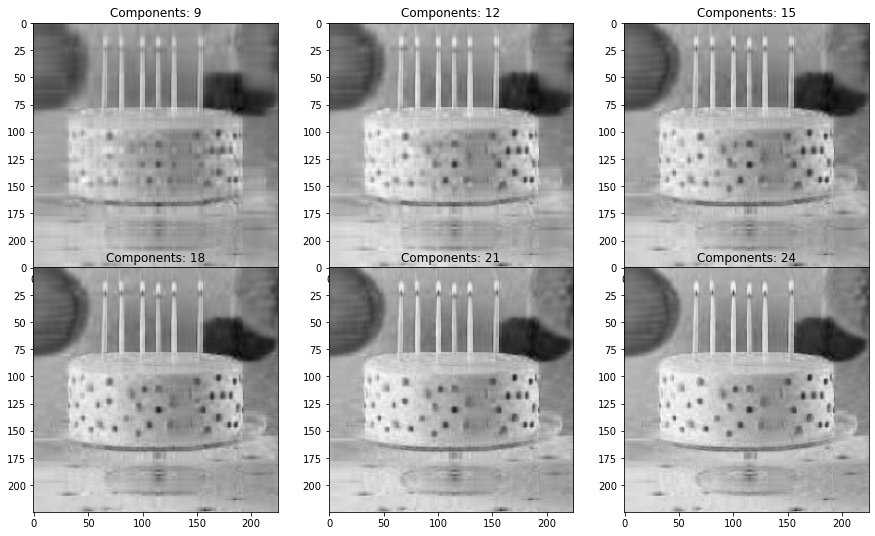

In [11]:
# Defining a function to get images for different values of k

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    
# Stating the values of k
    
ks = [9, 12, 15, 18, 21,24]

# Obtaining the images for different k

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()


* From the above images we can conlude that any component above 18 give us much clearer image. 
* We can see for Component 21 the image looks quite well with the candle lights appearing sharp and the cake decorations are also very clear.
* Component 24 is actually very clear image.
* Thus from 225 pixel we can easily get down to around 21-24 pixels using PCA.